In [1]:
from iminuit import Minuit
from iminuit.cost import LeastSquares
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def model(x,a,b):
    return a + b * x ** 2

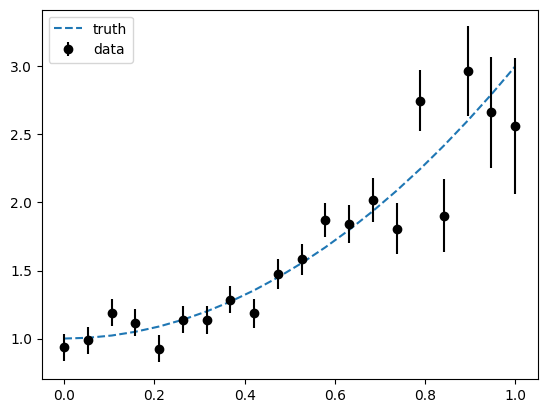

In [3]:
# random values

rng = np.random.default_rng(4)

truth = [1, 2]
x = np.linspace(0, 1, 20)
yt = model(x, *truth)
ye = 0.4 * x**5 + 0.1
y = rng.normal(yt, ye)

plt.plot(x, yt, ls="--", label="truth")
plt.errorbar(x, y, ye, fmt="ok", label="data")
plt.legend(loc="upper left")
plt.show()

In [10]:
c = LeastSquares(x, y, ye, model)
m = Minuit(c, a=5.1, b=5.1) #
m.limits["a"] = (-10, 10)
m.limits["b"] = (-10, 10)
m.migrad()
# m = Minuit(c, a=0, b=0, error_a=0.1, error_b=0.1, limit_a=(-10, 10), limit_b=(-10, 10))
display(m)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 25.29 (χ²/ndof = 1.4)      │              Nfcn = 46               │
│ EDM = 1.52e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.99    │   0.04    │            │            │   -10   │   10    │       │
│ 1 │ b    │   2.04    │   0.15    │            │            │   -10   │   10    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       a       b │
├───┼─────────────────┤
│ a │ 0.00139 -0.0037 │
│ b │ -0.0037  0.0226 │
└───┴─────────────────┘